In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data, paths,labels
!date -I

2024-05-19


# Schaefer (200 regions) - Glasser (360 regions) mapping using Dice score

We want to compare the response probabilities for selected ROI from F-Tract (see [01_f-tract](../01_f-tract/02_analysis_per_roi.ipynb)) with TMS-EEG responses (see [02_pytepfit](../02_pytepfit/05_analysis.ipynb)). Direct comparison of the TMS-EEG and F-TRACT results is not possible, because they do not share the same brain parcellation. The TMS-EEG dataset is published in Schaefer200 parcellation, which is not available for F-TRACT. Because of that, it is necessary to find a mapping between Glasser and Schaefer200 parcellation.

Lawrence et al. proposed the Dice coefficient as a possibility of similarity evaluation between ROIs across parcellations. For two ROIs $A$ and $B$, each consisting of a set of voxels, the Dice coefficient of association is calculated as  
$$
\frac{2 \cdot |A\cap B|}{|A|+|B|}.
$$
the score is a ratio of the overlap of the regions to the sum of their sizes. It is higher for regions with a big overlap with respect to their sizes.

Lawrence et al. provide a function for calculations of Dice scores between parcellations in Neuroparc repository at GitHub.\footnote{\url{https://github.com/neurodata/neuroparc/blob/5a5e7469671e65cb58087c47b69d0edb71dc2966/scripts/dice_correlation.py}} Using that, Dice score map between Schaefer200 and Glasser parcellations was created and saved as `interim/DICE/DICE_Glasser_Schaefer200_res-1x1x1.csv`.

Having the matrix with Dice scores for each pair of ROIs from Schaefer200 and Glasser, the easiest way to get comparable results is to assign one Schaefer200 ROI to each Glasser ROI based one the highest Dice coefficient (or vice versa, assign Glasser to Schaefer200 ROI). We can use this as a mapping for the vector of response probabilities in F-Tract and response AUC or other characteristics in TMS-EEG. This is done in this notebook.

Load the Dice scores, Glasser labels correspond to rows, Schaefer to columns:

<Axes: ylabel='regionName'>

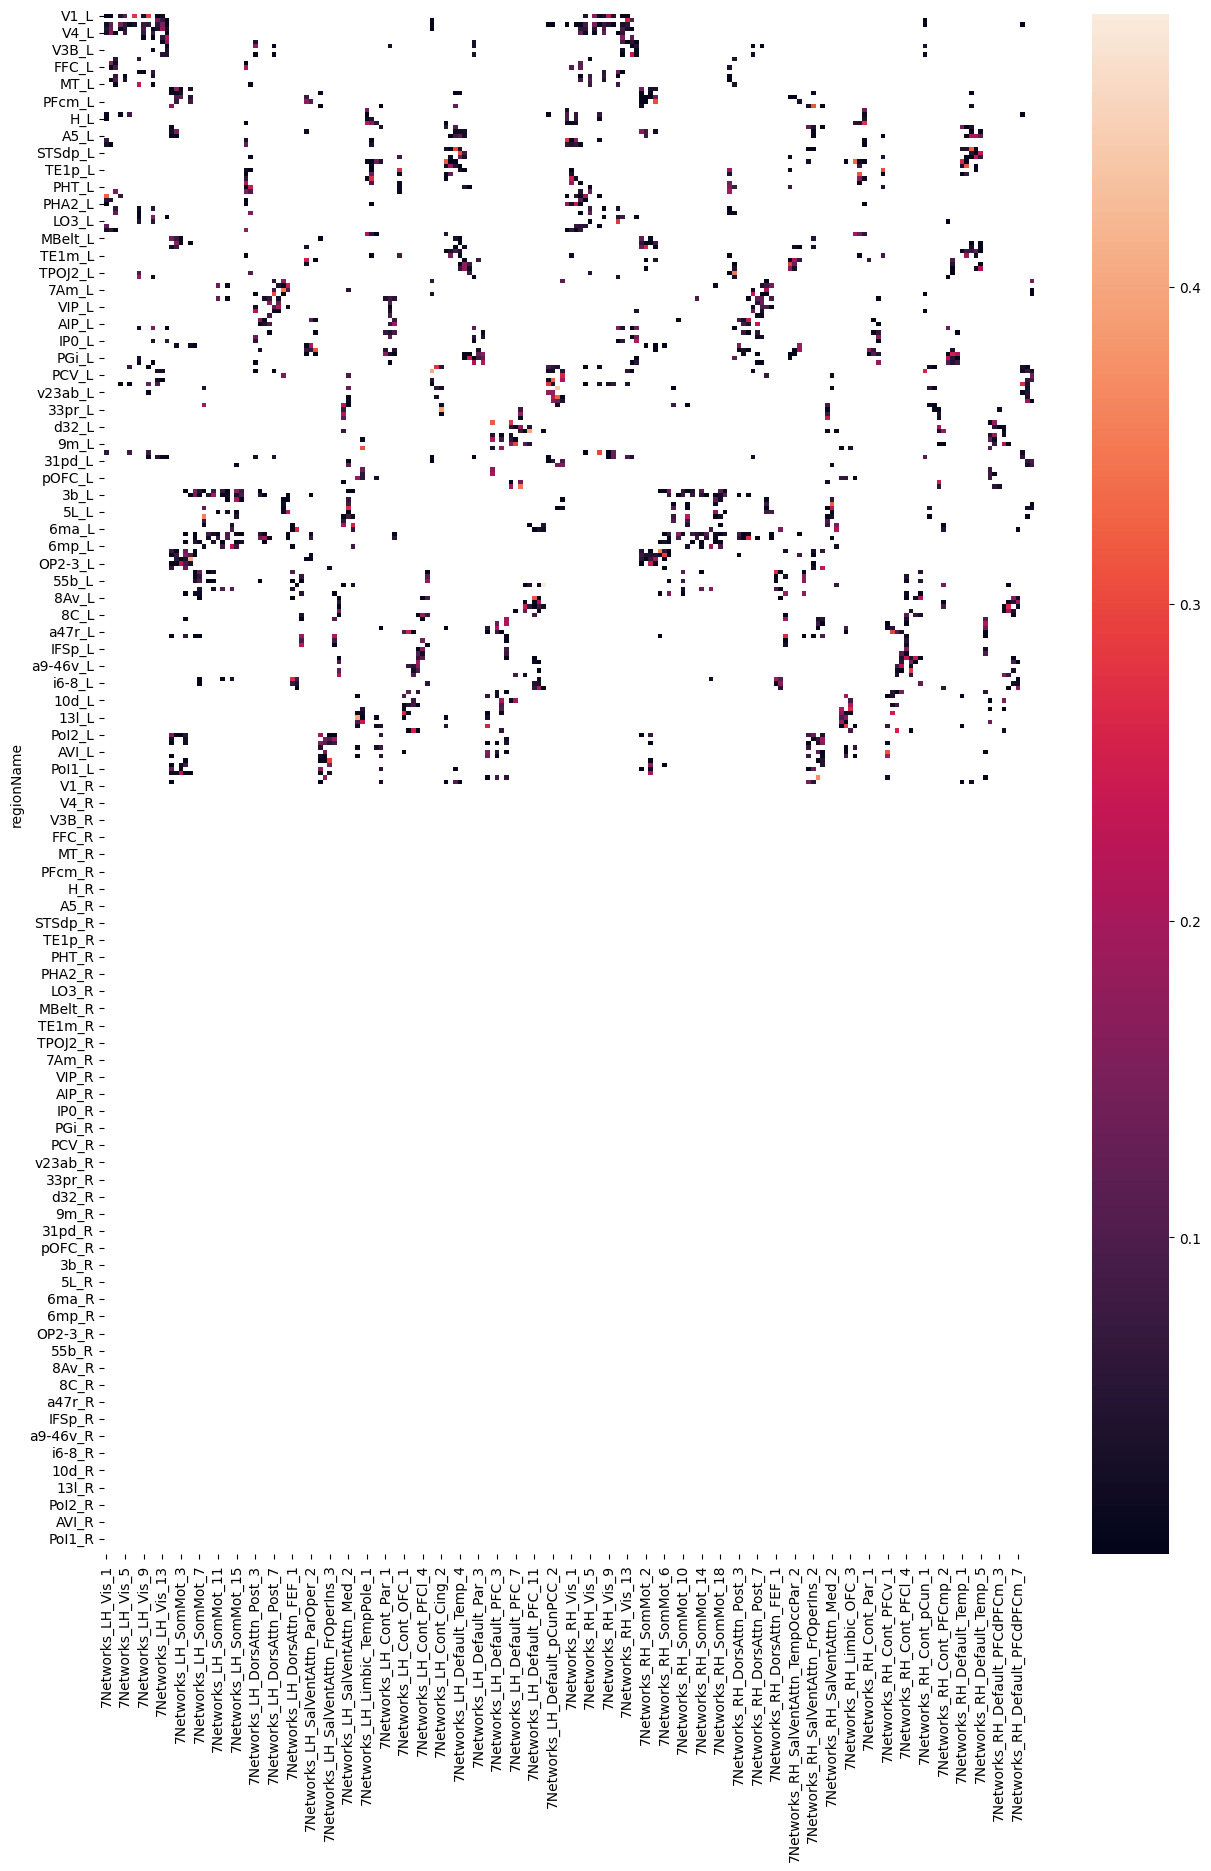

In [7]:
df_dice_schaefer = pd.read_csv( 
    paths.path('interim/DICE/DICE_Glasser_Schaefer200_res-1x1x1.csv'),
    index_col=0
)

fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(df_dice_schaefer, mask=df_dice_schaefer == 0.0, ax=ax)

The plot above shows that the dice scores are saved in a way ignoring hemisphere in Glasser; all the scores seem to be assigned to left hemisphere. We want to assign labels from right hemisphere in Schaefer to right hemisphere in Glasser (and left to left). Therefore we mohe the scores in upper right quarter of the matrix to lower right quarter.

In [8]:
dice_schaefer_array = df_dice_schaefer.to_numpy()
n_glasser,n_schaefer = dice_schaefer_array.shape
dice_schaefer_array[n_glasser//2:]=dice_schaefer_array[:n_glasser//2]
dice_schaefer_array[n_glasser//2:,:n_schaefer//2] = np.nan
dice_schaefer_array[:n_glasser//2,n_schaefer//2:] = np.nan
dice_schaefer_array

array([[0.00143277, 0.00198858, 0.        , ...,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , ...,        nan,        nan,
               nan],
       [0.02298851, 0.12194461, 0.        , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
df_dice_schaefer =  pd.DataFrame(data=dice_schaefer_array,   
                                index=df_dice_schaefer.index, 
                                columns=df_dice_schaefer.columns) 
df_dice_schaefer

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_PFCdPFCm_1,7Networks_RH_Default_PFCdPFCm_2,7Networks_RH_Default_PFCdPFCm_3,7Networks_RH_Default_PFCdPFCm_4,7Networks_RH_Default_PFCdPFCm_5,7Networks_RH_Default_PFCdPFCm_6,7Networks_RH_Default_PFCdPFCm_7,7Networks_RH_Default_pCunPCC_1,7Networks_RH_Default_pCunPCC_2,7Networks_RH_Default_pCunPCC_3
regionName,,,,,,,,,,,,,,,,,,,,,
V1_L,0.001433,0.001989,0.000000,0.042971,0.112614,0.000000,0.279401,0.0,0.032078,0.290259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6_L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2_L,0.022989,0.121945,0.000000,0.144727,0.064140,0.011392,0.031769,0.0,0.070741,0.064629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3_L,0.047550,0.144718,0.000000,0.008050,0.049874,0.000000,0.000000,0.0,0.081991,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4_L,0.032567,0.177670,0.002828,0.000000,0.072781,0.000000,0.000000,0.0,0.067541,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOP2_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PoI1_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ig_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
len(list(df_dice_schaefer.index))

360

<Axes: ylabel='regionName'>

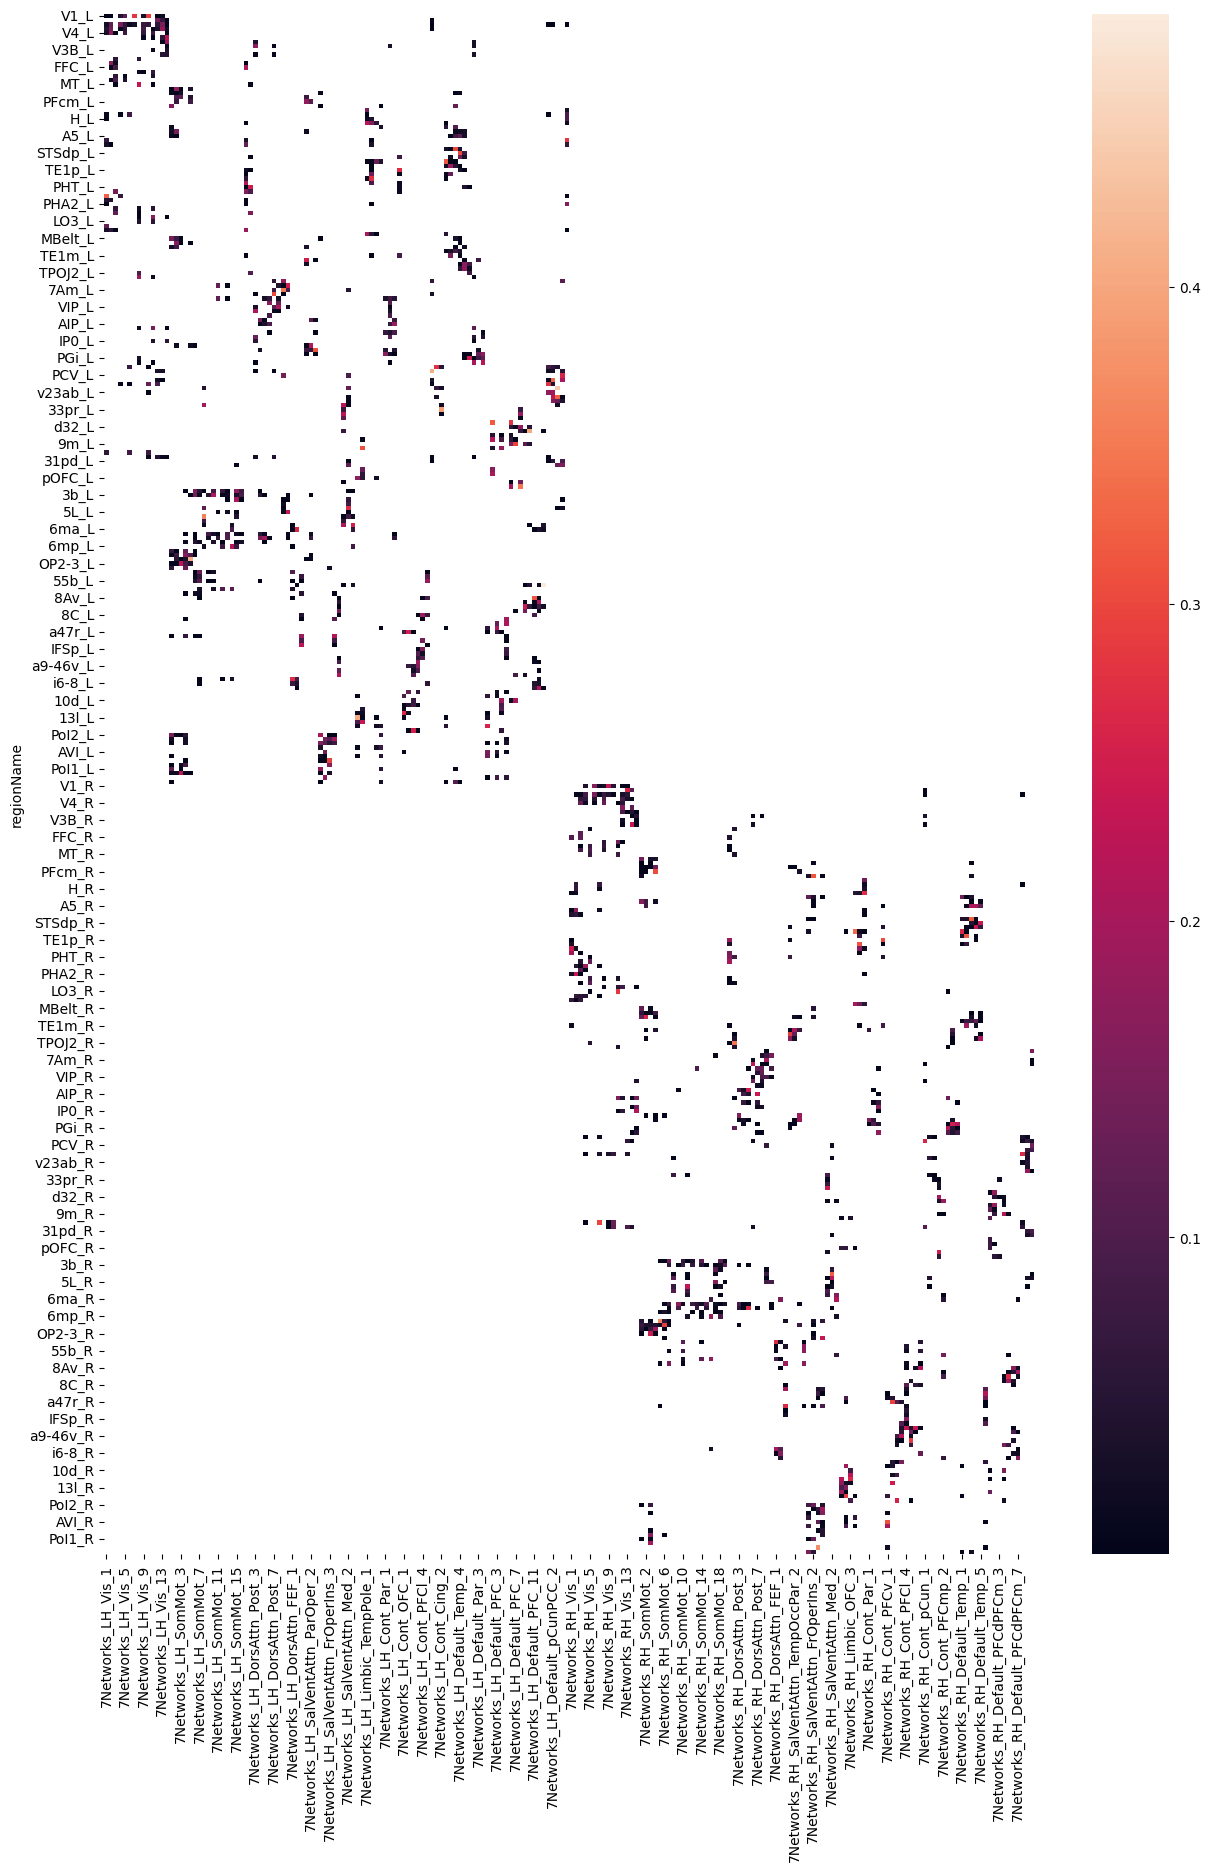

In [11]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(df_dice_schaefer, mask=df_dice_schaefer == 0.0, ax=ax)

It seems much better.

[The work by Momi et al.](https://doi.org/10.7554/eLife.83232) which was used as a source of our source reconstructed TMS-EEG data say they stimulated primary motor cortex in left hemisphere, which is ROI 4_L in Glasser parcellation. However, using the weights of stimulation (see [pytepfit/02_stimulation-site-extraction.ipynb](../02_pytepfit/02_stimulation-site-extraction.ipynb)), they stimulated 7Networks_LH_SomMot_9. Do these two map to each other using DICE?

List all Schaefer regions with nonzero overlap with 4_L in Glasser:

In [12]:
df_dice_4_L = df_dice_schaefer[df_dice_schaefer.index == "4_L"].transpose()
df_dice_4_L[df_dice_4_L["4_L"] > 0]

regionName,4_L
7Networks_LH_SomMot_4,0.000922
7Networks_LH_SomMot_6,0.153210
7Networks_LH_SomMot_7,0.049383
7Networks_LH_SomMot_8,0.000649
7Networks_LH_SomMot_10,0.080000
7Networks_LH_SomMot_12,0.065214
7Networks_LH_SomMot_13,0.000232
7Networks_LH_SomMot_15,0.171811
7Networks_LH_SomMot_16,0.081303
7Networks_LH_DorsAttn_Post_4,0.001085


7Networks_LH_SomMot_9 in not there. To be sure, list Dice scores of all somatomotor regions in Schaefer parcellation with 4_L:

In [13]:
def in_lh_sommot(x):
    if "_LH_SomMot_" in x:
        return True
    return False

df_dice_4_L[df_dice_4_L.index.map(in_lh_sommot)]

regionName,4_L
7Networks_LH_SomMot_1,0.000000
7Networks_LH_SomMot_2,0.000000
7Networks_LH_SomMot_3,0.000000
7Networks_LH_SomMot_4,0.000922
7Networks_LH_SomMot_5,0.000000
7Networks_LH_SomMot_6,0.153210
7Networks_LH_SomMot_7,0.049383
7Networks_LH_SomMot_8,0.000649
7Networks_LH_SomMot_9,0.000000
7Networks_LH_SomMot_10,0.080000


No. So what does 7Networks_LH_SomMot_9 map to?

In [14]:
df_dice_7Networks_LH_SomMot_9 = df_dice_schaefer[["7Networks_LH_SomMot_9"]][df_dice_schaefer[["7Networks_LH_SomMot_9"]].any(axis=1)]
df_dice_7Networks_LH_SomMot_9

,7Networks_LH_SomMot_9
regionName,
3b_L,0.051340
1_L,0.085667
2_L,0.023925
FEF_L,0.000948
55b_L,0.001950


7Networks_LH_SomMot_9  maps to 1_L, maybe 3b_L. 

### Crate mapping Glasser-Schaefer200

Create mapping between the regions in a greedy way, assign to each Glasser region on Schaefer region based on highest Dice score.

In [15]:
greedy_mapping = pd.DataFrame(df_dice_schaefer.idxmax(axis=1),columns=["schaefer"])
greedy_mapping

,schaefer
regionName,
V1_L,7Networks_LH_Vis_10
V6_L,7Networks_LH_Vis_12
V2_L,7Networks_LH_Vis_13
V3_L,7Networks_LH_Vis_13
V4_L,7Networks_LH_Vis_2
...,...
FOP2_R,7Networks_RH_SomMot_3
PoI1_R,7Networks_RH_SalVentAttn_FrOperIns_2
Ig_R,7Networks_RH_SomMot_3


There is a problem that not all Schaefer regions are assigned:

In [20]:
set(df_dice_schaefer.columns) - set(greedy_mapping["schaefer"])

{'7Networks_LH_Cont_Par_1',
 '7Networks_LH_Default_PFC_6',
 '7Networks_LH_Default_Par_2',
 '7Networks_LH_Default_Par_3',
 '7Networks_LH_Limbic_TempPole_3',
 '7Networks_LH_SomMot_12',
 '7Networks_LH_SomMot_16',
 '7Networks_LH_SomMot_9',
 '7Networks_LH_Vis_4',
 '7Networks_LH_Vis_5',
 '7Networks_LH_Vis_7',
 '7Networks_LH_Vis_9',
 '7Networks_RH_Cont_Cing_2',
 '7Networks_RH_Cont_Par_1',
 '7Networks_RH_Cont_Par_2',
 '7Networks_RH_Default_PFCdPFCm_6',
 '7Networks_RH_Default_Par_3',
 '7Networks_RH_DorsAttn_Post_3',
 '7Networks_RH_SomMot_10',
 '7Networks_RH_SomMot_12',
 '7Networks_RH_SomMot_13',
 '7Networks_RH_SomMot_14',
 '7Networks_RH_SomMot_15',
 '7Networks_RH_SomMot_18'}

But we hope it still somehow works. We try some other way in [DICE_02_glasser-schaefer200_maxmatch.ipynb](./DICE_02_glasser-schaefer200_maxmatch.ipynb), but it is actually not much better, so we use this greedy mapping.

In [17]:
greedy_mapping.to_csv(data.path('interim/DICE/Glasser_Schaefer200_labelMapping_greedy.csv'))

### Crate mapping Schaefer200-Glasser

Same approach, just the other way round, to each Schaefer assign Glasser.

In [18]:
greedy_mapping_reverse = pd.DataFrame(df_dice_schaefer.idxmax(axis=0),columns=["glasser"])
greedy_mapping_reverse

,glasser
7Networks_LH_Vis_1,VMV1_L
7Networks_LH_Vis_2,V4_L
7Networks_LH_Vis_3,PH_L
7Networks_LH_Vis_4,V2_L
7Networks_LH_Vis_5,V1_L
...,...
7Networks_RH_Default_PFCdPFCm_6,8Av_R
7Networks_RH_Default_PFCdPFCm_7,8Ad_R
7Networks_RH_Default_pCunPCC_1,POS1_R
7Networks_RH_Default_pCunPCC_2,31pv_R


In [19]:
greedy_mapping_reverse.to_csv(data.path('interim/DICE/Schaefer200_Glasser_labelMapping_greedy.csv'))